In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Data Loading

In [2]:
data_train = pd.read_csv('train_loan.csv')
data_test = pd.read_csv('test_loan.csv')

In [3]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data_train.shape

(614, 13)

In [5]:
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
data_test.shape

(367, 12)

# Data Process & Quality Check

In [7]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [9]:
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [11]:
data_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [12]:
data_test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [13]:
data_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
data_test['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

# Combining Train & Test Data and Separating the Target Variable

In [15]:
def combine_data():
    train = pd.read_csv('train_loan.csv')
    test = pd.read_csv('test_loan.csv')
    targets = train.Loan_Status
    train.drop('Loan_Status', 1, inplace = True)
    combined = train.append(test)
    combined.reset_index(inplace = True)
    combined.drop(['index','Loan_ID'], inplace = True, axis = 1)
    return combined

In [16]:
cdata = combine_data()

In [17]:
cdata.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [18]:
cdata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [19]:
cdata.isnull().sum()

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [20]:
cdata.shape

(981, 11)

# Imputing Missing Values

In [21]:
cdata['Gender'] = cdata['Gender'].fillna( cdata['Gender'].dropna().mode().values[0])
cdata['Married'] = cdata['Married'].fillna( cdata['Married'].dropna().mode().values[0])
cdata['Dependents'] = cdata['Dependents'].fillna( cdata['Dependents'].dropna().mode().values[0])
cdata['Self_Employed'] = cdata['Self_Employed'].fillna( cdata['Self_Employed'].dropna().mode().values[0])
cdata['LoanAmount'] = cdata['LoanAmount'].fillna( cdata['LoanAmount'].dropna().mean())
cdata['Loan_Amount_Term'] = cdata['Loan_Amount_Term'].fillna( cdata['Loan_Amount_Term'].dropna().mode().values[0])
cdata['Credit_History'] = cdata['Credit_History'].fillna( cdata['Credit_History'].dropna().mode().values[0])

# Dummyfying & Separating variables for modeling

In [22]:
def process_gender():
    global cdata
    cdata['Gender'] = cdata['Gender'].map({'Male':1,'Female':0})

In [23]:
def process_marital_status():
    global cdata
    cdata['Married'] = cdata['Married'].map({'Yes':1,'No':0})

In [24]:
def process_dependents():
    global cdata
    cdata['Single'] = cdata['Dependents'].map(lambda d: 1 if d=='1' else 0)
    cdata['Small_Family'] = cdata['Dependents'].map(lambda d: 1 if d=='2' else 0)
    cdata['Large_Family'] = cdata['Dependents'].map(lambda d: 1 if d=='3+' else 0)
    cdata.drop(['Dependents'], axis=1, inplace=True)

In [25]:
def process_education():
    global cdata
    cdata['Education'] = cdata['Education'].map({'Graduate':1,'Not Graduate':0})

In [26]:
def process_employment():
    global cdata
    cdata['Self_Employed'] = cdata['Self_Employed'].map({'Yes':1,'No':0})

In [27]:
def process_income():
    global cdata
    cdata['Total_Income'] = cdata['ApplicantIncome'] + cdata['CoapplicantIncome']
    cdata.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [28]:
def process_loan_amount():
    global cdata
    cdata['Debt_Income_Ratio'] = cdata['Total_Income'] / cdata['LoanAmount']

In [29]:
cdata['Loan_Amount_Term'].value_counts()

360.0    843
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

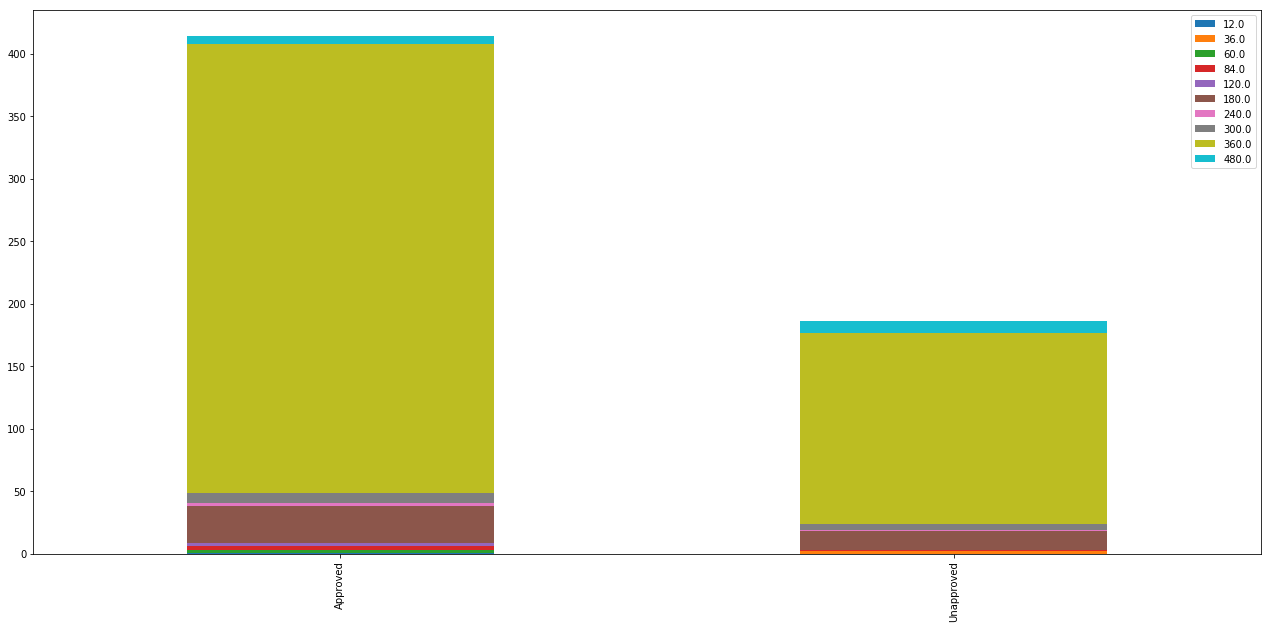

In [30]:
approved_term = data_train[data_train['Loan_Status']=='Y']['Loan_Amount_Term'].value_counts()
unapproved_term = data_train[data_train['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
df = pd.DataFrame([approved_term,unapproved_term])
df.index = ['Approved','Unapproved']
df.plot(kind='bar', stacked=True, figsize=(22,10))

In [31]:
def process_loan_term():
    global cdata
    cdata['Very_Short_Term'] = cdata['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
    cdata['Short_Term'] = cdata['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
    cdata['Long_Term'] = cdata['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
    cdata['Very_Long_Term'] = cdata['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
    cdata.drop('Loan_Amount_Term', axis=1, inplace=True)

In [32]:
def process_credit_history():
    global cdata
    cdata['Credit_History_Bad'] = cdata['Credit_History'].map(lambda c: 1 if c==0 else 0)
    cdata['Credit_History_Good'] = cdata['Credit_History'].map(lambda c: 1 if c==1 else 0)
    cdata['Credit_History_Unknown'] = cdata['Credit_History'].map(lambda c: 1 if c==2 else 0)
    cdata.drop('Credit_History', axis=1, inplace=True)

In [33]:
def process_property():
    global cdata
    property_dummies = pd.get_dummies(cdata['Property_Area'], prefix='Property')
    cdata = pd.concat([cdata, property_dummies], axis=1)
    cdata.drop('Property_Area', axis=1, inplace=True)

In [34]:
process_gender()
process_marital_status()
process_dependents()
process_education()
process_employment()
process_income()
process_loan_amount()
process_loan_term()
process_credit_history()
process_property()

In [35]:
cdata.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Single,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
0,1,0,1,0,142.51153,0,0,0,5849.0,41.042293,0,0,0,1,0,1,0,0,0,1
1,1,1,1,0,128.00000,1,0,0,6091.0,47.585938,0,0,0,1,0,1,0,1,0,0
2,1,1,1,1,66.00000,0,0,0,3000.0,45.454545,0,0,0,1,0,1,0,0,0,1
3,1,1,0,0,120.00000,0,0,0,4941.0,41.175000,0,0,0,1,0,1,0,0,0,1
4,1,0,1,0,141.00000,0,0,0,6000.0,42.553191,0,0,0,1,0,1,0,0,0,1


In [36]:
def feature_scaling(df):
    df -= df.min()
    df /= df.max()
    return df

In [37]:
cdata['LoanAmount'] = feature_scaling(cdata['LoanAmount'])
cdata['Total_Income'] = feature_scaling(cdata['Total_Income'])
cdata['Debt_Income_Ratio'] = feature_scaling(cdata['Debt_Income_Ratio'])

In [38]:
cdata.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Single,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
0,1,0,1,0,0.193215,0,0,0,0.055394,0.060682,0,0,0,1,0,1,0,0,0,1
1,1,1,1,0,0.172214,1,0,0,0.058435,0.073382,0,0,0,1,0,1,0,1,0,0
2,1,1,1,1,0.082489,0,0,0,0.019583,0.069245,0,0,0,1,0,1,0,0,0,1
3,1,1,0,0,0.160637,0,0,0,0.043980,0.060939,0,0,0,1,0,1,0,0,0,1
4,1,0,1,0,0.191027,0,0,0,0.057292,0.063614,0,0,0,1,0,1,0,0,0,1


# Separating the Combined Data after processing and imputation

In [39]:
def recover_train_test_target():
    global cdata, data_train
    targets = data_train['Loan_Status'].map({'Y':1,'N':0})
    train = cdata.head(614)
    test = cdata.iloc[614:]
    return train, test, targets

In [40]:
train, test, targets = recover_train_test_target()

In [41]:
train.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Single,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
0,1,0,1,0,0.193215,0,0,0,0.055394,0.060682,0,0,0,1,0,1,0,0,0,1
1,1,1,1,0,0.172214,1,0,0,0.058435,0.073382,0,0,0,1,0,1,0,1,0,0
2,1,1,1,1,0.082489,0,0,0,0.019583,0.069245,0,0,0,1,0,1,0,0,0,1
3,1,1,0,0,0.160637,0,0,0,0.043980,0.060939,0,0,0,1,0,1,0,0,0,1
4,1,0,1,0,0.191027,0,0,0,0.057292,0.063614,0,0,0,1,0,1,0,0,0,1


In [42]:
train.shape

(614, 20)

In [43]:
test.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Single,Small_Family,Large_Family,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
614,1,1,1,0,0.146165,0,0,0,0.053772,0.081950,0,0,0,1,0,1,0,0,0,1
615,1,1,1,0,0.169320,1,0,0,0.039393,0.051511,0,0,0,1,0,1,0,0,0,1
616,1,1,1,0,0.287988,0,1,0,0.067347,0.044475,0,0,0,1,0,1,0,0,0,1
617,1,1,1,0,0.131693,0,1,0,0.043289,0.075855,0,0,0,1,0,1,0,0,0,1
618,1,0,0,0,0.099855,0,0,0,0.023052,0.062540,0,0,0,1,0,1,0,0,0,1


In [44]:
test.shape

(367, 20)

In [45]:
targets.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

# Modelling Technique

# Decision Tree Classification

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [47]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=1)

In [48]:
cross_val_score(tree, X = train, y = targets, n_jobs = -1, cv=5)

array([0.81451613, 0.76612903, 0.78688525, 0.86065574, 0.81967213])

In [49]:
cross_val_score(tree,X = train, scoring = 'roc_auc', y = targets, n_jobs = -1, cv = 5)

array([0.71206637, 0.64208145, 0.67230576, 0.7835213 , 0.71773183])

In [50]:
params = {'criterion':['entropy','gini'],'max_depth':[3,5,7,9]}

In [51]:
best_tree = GridSearchCV(tree, param_grid = params, scoring = 'roc_auc', cv = 5, n_jobs =-1)

In [52]:
train_tree = best_tree.fit(train, targets)
train_tree

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [53]:
cross_val_score(best_tree.best_estimator_, X = train, y = targets, n_jobs = -1, cv=5)

array([0.80645161, 0.75806452, 0.78688525, 0.83606557, 0.81147541])

In [54]:
best_tree.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [55]:
test_tree  = train_tree.predict(test)
test_tree

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [56]:
output_decision = train_tree.predict(test).astype(int)
df_output_decision = pd.DataFrame()
dt = pd.read_csv('test_loan.csv')
df_output_decision['Loan_ID'] = dt['Loan_ID']
df_output_decision['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(output_decision)
df_output_decision[['Loan_ID','Loan_Status']].to_csv('output_dt.csv',index=False)

In [57]:
analysis_dt = pd.read_csv('output_dt.csv')

In [58]:
analysis_dt.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# Random Forest Classification

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [60]:
forest = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', max_features = 'sqrt', n_jobs = -1)

In [61]:
def compute_score(forest, X, y, scoring='accuracy'):
    score = cross_val_score(forest, X, y, cv = 5, scoring = scoring)
    return np.mean(score)

In [62]:
forest = forest.fit(train, targets)

In [63]:
features = pd.DataFrame()
features['Feature'] = train.columns
features['Importance'] = forest.feature_importances_
features.sort_values(by = ['Importance'], ascending = False, inplace = True)
features.set_index('Feature', inplace = True)

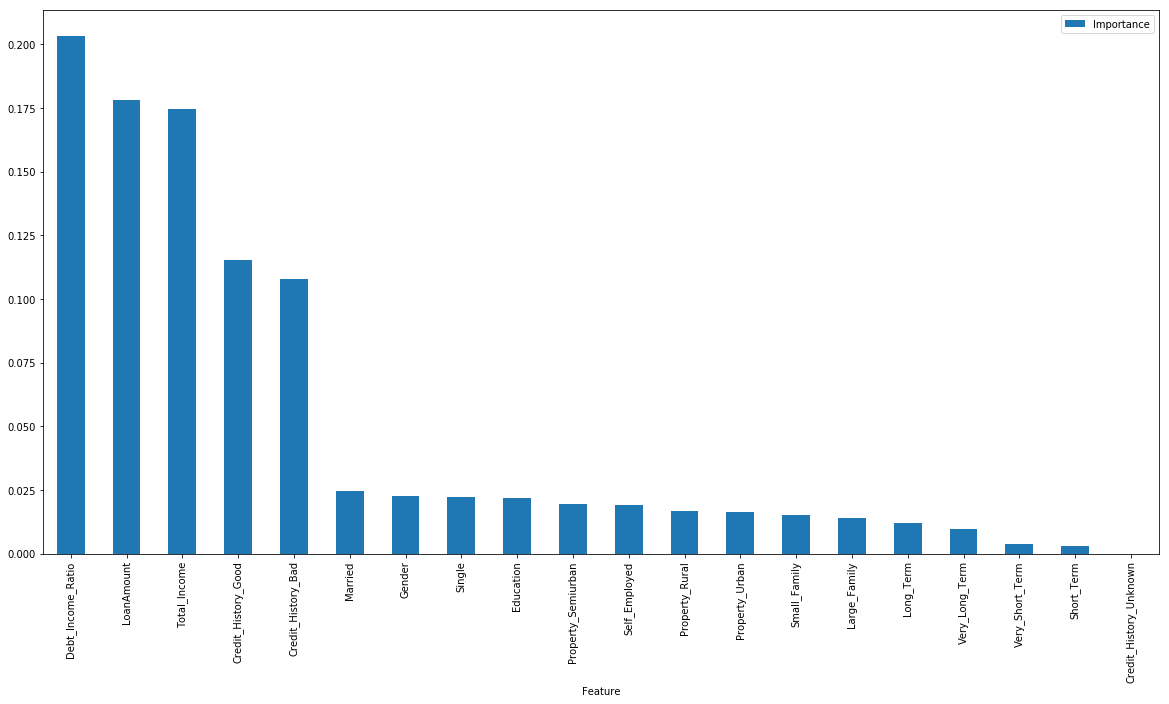

In [64]:
features.plot(kind = 'bar', figsize = (20, 10))

In [65]:
model = SelectFromModel(forest, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(614, 5)

In [66]:
test_reduced = model.transform(test)
test_reduced.shape

(367, 5)

In [67]:
parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
model = RandomForestClassifier(**parameters)
model.fit(train, targets)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
compute_score(model, train, targets, scoring='accuracy')

0.7998413537810682

In [69]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('test_loan.csv')
df_output['Loan_ID'] = aux['Loan_ID']
df_output['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(output)
df_output[['Loan_ID','Loan_Status']].to_csv('output_rf.csv',index=False)

In [70]:
analysis_rf = pd.read_csv('output_rf.csv')

In [71]:
analysis_rf.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
